# Datastory Draft C3 Informatievisualisatie
- Thijs Schmidt (14605023)
- Sofie Shamba (14610027)
- Koray Pieterse (13722778)
- Sam Busstra (14643286)

# Opwarming van de aarde, hoe zit dat nou?

## Introductie
Klimaatverandering staat de laatste jaren wereldwijd hoog op de agenda. Volgens de Rijksoverheid (2023 ) is de gemiddelde temperatuur van de aarde namelijk met 1 graad gestegen. Niet alleen dat, maar ook de zeespiegel is in dezelfde tijd met 20 centimeter gestegen. Dit kan veel gevolgen hebben voor de mens en de natuur als het steeds warmer wordt op aarde. Zware stormen, grote overstromingen en een tekort aan drinkwater of voedsel zijn consequenties waar we in de toekomst mee moeten omgaan. Daarom hebben al veel landen, waaronder de Europese landen, al klimaatdoelstellingen voor de komende jaren. Met het oog op de toekomst is het daarom ook belangrijk om te kijken naar welke landen veel CO2-uitstoot hebben. Een reden voor de temperatuurverandering kan zijn, dat als een land een hoge CO2-uitstoot heeft, dat dat land ook een sterke temperatuurverandering ervaart. Het gaat daarbij om de nationale schaal en de bijdrage aan het broeikaseffect. De vuistregel die geldt is: hoe hoger de CO2-uitstoot binnen een land, hoe groter de verwachte temperatuurstijging binnen dat land. Een andere kijk op de klimaatverandering door de CO2-uitstoot kan zijn dat hoe groter een land is in vierkante kilometer, hoe groter de CO2-uitstoot. Hierbij is de populatie van een land ook belangrijk, omdat hoe meer mensen er in een land wonen hoe hoger de CO2-uitstoot waarschijnlijk is doordat al die mensen meer energie verbranden. 

In [268]:
# Importeer alle benodigde packages
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
np.seterr(divide='raise', over='raise', under='raise', invalid='raise')
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

## Datapreprocessing
Er worden 2 datasets gebruikt in het onderzoek. De eerste dataset ‘CO2 Emission by countries Year wise (1750-2022)’ van Kaggle.com gaat over de CO2-uitstoot door landen per jaar, van 1750 tot 2022. Met de dataset kunnen voorspellingen worden gedaan over klimaatverandering en de opwarming van de aarde. Voor elk land wordt aangegeven hoeveel CO2 het heeft uitgestoten. De tweede dataset ‘Temperature Change’ van Kaggle.com bevat data over de gemiddelde temperatuurverandering per land. De gegevens in de dataset bevatten wekelijkse, maandelijkse en jaarlijkse temperatuurafwijkingen gedurende de periode van 1961-2019. 
De data van de datasets wordt 'processed' door de relevante variabelen te selecteren aan de hand van de perspectieven en de argumenten die zijn gesteld. We gebruiken de landen als ‘key variabel’ en de jaren 2010-2019 om de twee datasets met elkaar te vergelijken. Ook worden de ontbrekende waarden in de datasets gefilterd en eruit gehaald. Om de data met elkaar te vergelijken wordt de gemiddelde jaarlijkse uitstoot per land tussen 2010 en 2019 genomen. Vervolgens wordt de uitstoot per vierkante kilometer berekend door de gemiddelde jaarlijkse uitstoot te delen door de totale oppervlakte van het land. Daarna wordt dit ook gedaan voor de bevolking, door de gemiddelde jaarlijkse uitstoot te delen door de bevolking, waardoor je de gemiddelde jaarlijkse uitstoot per hoofd krijgt voor ieder land. 

In [269]:
# lees dataframe CO2 in
CO2 = pd.read_csv('CO2.csv', encoding='latin-1')
CO2

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
0,Afghanistan,AF,93,1750,0.0,41128771.0,652230.0,0.40%,63/km²
1,Afghanistan,AF,93,1751,0.0,41128771.0,652230.0,0.40%,63/km²
2,Afghanistan,AF,93,1752,0.0,41128771.0,652230.0,0.40%,63/km²
3,Afghanistan,AF,93,1753,0.0,41128771.0,652230.0,0.40%,63/km²
4,Afghanistan,AF,93,1754,0.0,41128771.0,652230.0,0.40%,63/km²
...,...,...,...,...,...,...,...,...,...
59615,Zimbabwe,ZW,263,2016,736467042.0,16320537.0,390757.0,0.30%,42/km²
59616,Zimbabwe,ZW,263,2017,746048675.0,16320537.0,390757.0,0.30%,42/km²
59617,Zimbabwe,ZW,263,2018,757903042.0,16320537.0,390757.0,0.30%,42/km²
59618,Zimbabwe,ZW,263,2019,768852126.0,16320537.0,390757.0,0.30%,42/km²


In [270]:
# filter de CO2 dataframe
filtered_CO2 = CO2.loc[(CO2['Year'] >= 2010) & (CO2['Year'] <= 2019)]

# groepeer de dataframe op land
CO2_grouped = filtered_CO2.groupby('Country').mean()
CO2_grouped = CO2_grouped.drop('Year', axis=1)

# maak nieuwe kolommen aan voor uitstoot per km2 en hoofd bevolking
CO2_grouped['Uitstoot per km2'] = CO2_grouped['CO2 emission (Tons)'] / CO2_grouped['Area']
CO2_grouped['Uitstoot per hoofd vd bevolking'] = CO2_grouped['CO2 emission (Tons)'] / CO2_grouped['Population(2022)']

# laat geüpdate frame zien
CO2_grouped

C:\Users\thijs\AppData\Local\Temp\ipykernel_9288\3844233090.py:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,CO2 emission (Tons),Population(2022),Area,Uitstoot per km2,Uitstoot per hoofd vd bevolking
Country,,,,,
Afghanistan,1.413836e+08,41128771.0,652230.0,216.769580,3.437584
Albania,2.589859e+08,2842321.0,28748.0,9008.833373,91.117767
Algeria,3.745971e+09,44903225.0,2381741.0,1572.786779,83.423201
Andorra,1.244330e+07,79824.0,468.0,26588.244444,155.884175
Angola,5.307960e+08,35588987.0,1246700.0,425.760835,14.914615
...,...,...,...,...,...
Vietnam,2.804876e+09,98186856.0,331212.0,8468.522025,28.566717
Wallis and Futuna,3.690437e+05,NaN,NaN,NaN,NaN
Yemen,5.554037e+08,33696614.0,527968.0,1051.964625,16.482477


### PLOT 1: 3D spreidingsplot over bevolking, oppervlakte en uitstoot

In [271]:
# Maak 3D scatter plot
fig = go.Figure(data=go.Scatter3d(
    x=CO2_grouped['Population(2022)'],
    y=CO2_grouped['Area'],
    z=CO2_grouped['CO2 emission (Tons)'],
    mode='markers',
    marker=dict(
        size=8,
        color=CO2_grouped['CO2 emission (Tons)'],
        colorscale='Viridis',
        opacity=0.8
    )
))

# Pas layout aan
fig.update_layout(
    scene=dict(
        xaxis_title='CO2 uitstoot',
        yaxis_title='Oppervlakte',
        zaxis_title='Bevolkingsomvang'
    ),
    width=1000,
    height=700,
    title='3D spreidingsplot van de correlatie tussen CO2 uitstoot, bevolkingsomvang en totale oppervlakte per land'
)

# laat plot zien
fig.show()

*Beschrijving PLOT 1*:
- Op de x-as staat de bevolking per land
- Op de y-as staat de oppervlakte per land
- Op de z-as staat de CO2 uitstoot per land
- De kern van deze plot is dat er een correlatie is tussen de oppervlakte, bevolkingsomvang, en de hoeveelheid CO2-uitstoot van een land.

Zoals te zien is in plot 1 is er een correlatie tussen de grootte van een land in vierkante kilometer, de bevolkingsomvang en de hoeveelheid CO2-uitstoot. De meeste landen zijn wat kleiner en hebben daardoor vaker een kleinere CO2-uitstoot, terwijl de grotere landen in de scatterplot, met een grotere bevolkingsomvang, ook meer CO2-uitstoot hebben. Dus hoe groter de bevolkingsomvang, hoe hoger de CO2-uitstoot is en dit toont een evenredig verband. Dit komt doordat grotere populaties over het algemeen meer hulpbronnen verbruiken, waaronder energie voor verwarming, koeling, transport, enz., wat kan leiden tot een grotere CO2-uitstoot. Daarnaast hebben grotere landen vaak meer natuurlijke hulpbronnen en ruimte voor industriële en agrarische activiteiten, wat kan leiden tot hogere CO2-uitstoot. Bovendien kunnen grotere landen ook meer infrastructuur en transportnetwerken hebben, wat ook bijdraagt aan de CO2-uitstoot.

### PLOT 2: Donut diagram over gemiddelde procentuele uitstoot per land (2010-2019)

In [272]:
# Bereken aandeel per land
total = CO2_grouped['CO2 emission (Tons)'].sum()
CO2_grouped['Percentage'] = CO2_grouped['CO2 emission (Tons)'] / total * 100

# Filter landen die lager dan 3% hebben
small_emitters = CO2_grouped[CO2_grouped['Percentage'] < 3]

# Groepeer lager dan 3% als overige categorie
small_emitters_total = small_emitters['CO2 emission (Tons)'].sum()
small_emitters_row = pd.DataFrame(data={'Percentage': [small_emitters_total], 'CO2 emission (Tons)': [small_emitters_total]}, index=['Overig'])

# Maak overige categorie
combined_grouped = pd.concat([CO2_grouped[CO2_grouped['Percentage'] >= 3], small_emitters_row])

# Maak plot
fig = px.pie(combined_grouped, values='CO2 emission (Tons)', names=combined_grouped.index, hole=0.8)

# Pas layout aan
fig.update_layout(
    title='Gemiddelde procentuele CO2 uitstoot per land tussen 2010 en 2019',
    showlegend=False,
    height=650
)

# Fix labels
fig.update_traces(textposition='outside', textinfo='label+percent')

# laat plot zien
fig.show()

*Beschrijving PLOT 2*:
- Voor elk land is het procentuele aandeel van de mondiale CO2-uitstoot berekent.
- De kern van deze plot is dat er een aantal landen zijn die procentueel veel meer uitstoten dan anderen.

In de bovenstaande Donut chart is de gemiddelde procentuele CO2-uitstoot per land tussen 2010 en 2019 te zien. De plot onthult dat de Verenigde Staten maar liefst 26.5% van de mondiale CO2-uitstoot veroorzaakt, waarmee het de voornaamste verantwoordelijke is. Direct na de Verenigde Staten staat China als één na hoogste land met de grootste CO2-uitstoot. Op rangvolgorde volgen Rusland, Duitsland, Verenigd Koninkrijk en uiteindelijk Japan als de 6 landen die het meeste bijdragen aan deze uitstoot. De overige landen liggen allemaal onder de 3.0% uitstoot op mondiaal niveau, waardoor ze in vergelijking met de andere landen bescheiden bijdragen.

In [273]:
# lees dataframe temperature changes in
temp = pd.read_csv('temperature_change.csv', encoding='latin-1')
temp

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9651,5873,OECD,7018,JunJulAug,6078,Standard Deviation,°C,0.247,0.247,0.247,...,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247
9652,5873,OECD,7019,SepOctNov,7271,Temperature change,°C,0.036,0.461,0.665,...,0.958,1.106,0.885,1.041,0.999,1.670,1.535,1.194,0.581,1.233
9653,5873,OECD,7019,SepOctNov,6078,Standard Deviation,°C,0.378,0.378,0.378,...,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378
9654,5873,OECD,7020,Meteorological year,7271,Temperature change,°C,0.165,-0.009,0.134,...,1.246,0.805,1.274,0.991,0.811,1.282,1.850,1.349,1.088,1.297


In [274]:
# zorg dat landen kolom in beide sets zelfde naam heeft
temp.rename(columns={'Area': 'Country'}, inplace=True)

# stel conditie om alleen op verschil te meten
condition = (temp['Element Code'] == 7271)

# Filter rijen uit die niet aan conditie voldoen
filtered_temp = temp[condition]

# groepeer op land
temp_grouped = filtered_temp.groupby('Country').mean()

# drop onnodige kolommen
temp_correct = temp_grouped.drop(['Area Code', 'Months Code', 'Element Code', 'Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969', 'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977', 'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985', 'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009'], axis=1)

# bereken gemiddelde stijging per land
temp_correct['Average'] = temp_correct.mean(axis=1)

# maak aparte frame voor gemiddelde
temp_avg = temp_correct['Average']

C:\Users\thijs\AppData\Local\Temp\ipykernel_9288\2875976270.py:11: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



### PLOT 3: Spreidingsplot voor temperatuursstijging en CO2 uitstoot per land (2010-2019)

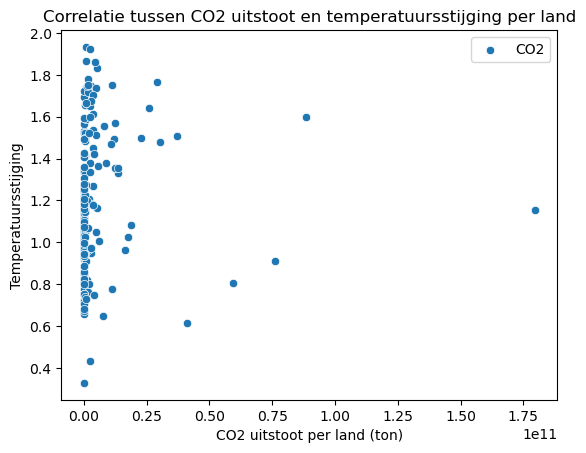

In [275]:
# voeg datasets samen
merged_df = pd.merge(CO2_grouped, temp_avg, on='Country', how='inner')
merged_df

# Maak scatter plot
sns.scatterplot(data=merged_df, x='CO2 emission (Tons)', y='Average', label='CO2')

# Stel plot titel en labels in
plt.title('Correlatie tussen CO2 uitstoot en temperatuursstijging per land')
plt.xlabel('CO2 uitstoot per land (ton)')
plt.ylabel('Temperatuursstijging')

# laat plot zien
plt.legend()
plt.show()

*Beschrijving PLOT 3*:
- Op de x-as staat de CO2-uitstoot per land (in tonnen)
- Op de y-as staat temperatuursstijging per land in graden Celsius
- Voor deze plot zijn de twee datasets samengevoegd. Beide variabelen komen dus oorspronkelijk uit andere datasets.
- De kern van deze plot is dat er geen correlatie is tussen de temperatuurstijging in een land en de hoeveelheid CO2-uitstoot in datzelfde land.

Zoals te zien is in plot 3, is er geen duidelijke correlatie tussen een land dat een hoge CO₂-uitstoot heeft en een temperatuurverhoging in dat specifieke land. Een verklaring hiervoor kan zijn dat de CO₂ die uitgestoten wordt, niet op een nationaal niveau maar op een mondiaal niveau zorgt voor een temperatuurverhoging. Broeikasgassen zoals CO₂ houden warmte vast in de atmosfeer, wat bijdraagt aan de opwarming van de aarde. Dit is een globaal fenomeen, omdat deze gassen gelijkmatig over de hele aardatmosfeer worden verspreid, ongeacht waar ze oorspronkelijk zijn uitgestoten (Chen et al., 2014). Het is dus niet zo dat het gebied waar meer CO₂ wordt uitgestoten ook per se warmer wordt. 

### PLOT 4: Landen met een stijging van 1.5 graad celsius

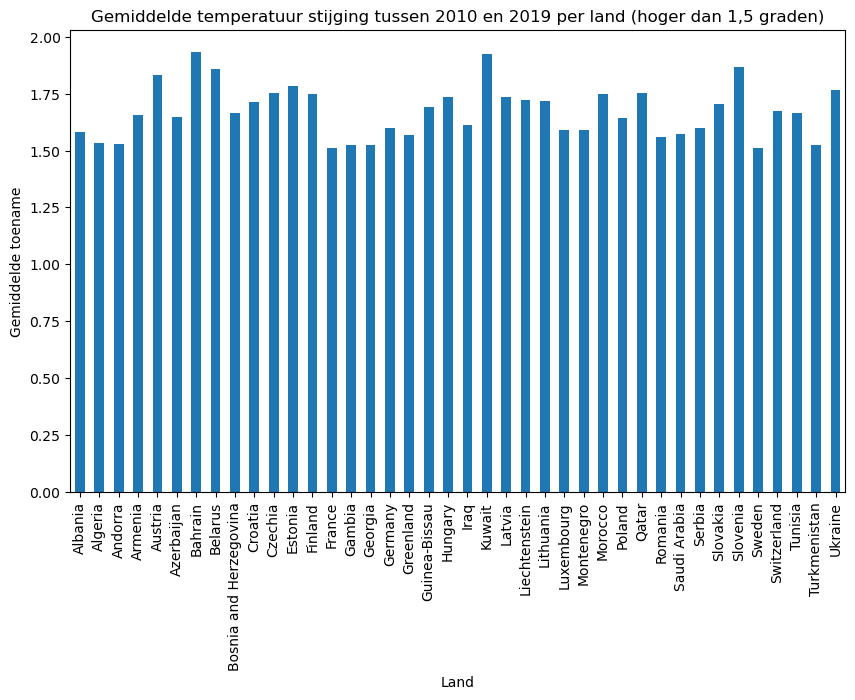

In [276]:
# voeg datasets samen
result = pd.merge(CO2_grouped, temp_avg, on='Country', how='inner')

# Filter data op 1.5 graad of hoger
filtered_result = result[result['Average'] >= 1.5]

# stel grootte in
plt.figure(figsize=(10, 6))

# maak bar plot
filtered_result['Average'].plot(kind='bar')

# Stel x-axis label in
plt.xlabel('Land')

# Stel y-axis label in
plt.ylabel('Gemiddelde toename')

# Maak titel
plt.title('Gemiddelde temperatuur stijging tussen 2010 en 2019 per land (hoger dan 1,5 graden)')

# laat plot zien
plt.show()

*Beschrijving PLOT 4*:
- Op de x-as staan landen die in aanmerking komen voor het feit dat hun temperatuur boven de anderhalve graad Celsius is gestegen.
- Op de y-as staat temperatuursstijging per in graden Celsius
- Voor deze plot zijn de landen gefilterd op het feit of ze voldoen aan de anderhalve graad norm.
- De kern van deze plot is dat er veel landen zijn die niet perse een hoge uitstoot hebben, maar toch de dupe zijn van temperatuursstijgingen.

In plot 4 zijn de landen te zien die te maken hebben met een opwarming van anderhalf graden celsius of hoger. Er zijn twee dingen merkwaardig aan deze plot. Allereerst, zijn alle landen op deze plot onderdeel van het noordelijk halfrond van de aarde. Wat ook opvallend is, is dat veel van deze landen geen grote uitstoters zijn. Neem bijvoorbeeld een land als Luxemburg of Tsjechië, dat zijn twee vrij 'onschuldige' landen als het gaat om mondiale uitstoot. Die landen hebben echter toch te maken met een aanzienlijk temperatuursverschil ten op zichte van een decennium geleden. Dit bevestigt dan ook het feit dat klimaatverandering geen lokale kwestie is, maar juist een probleem wat invloed heeft op alle landen, ongeacht het aandel van uitstoot.

### PLOT 5: Gemiddelde mondiale temperatuursstijging

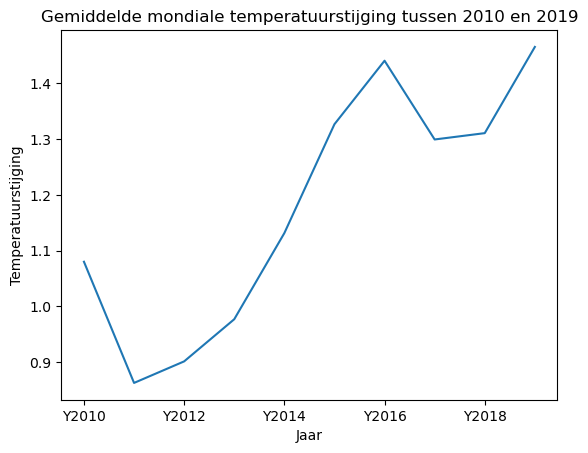

In [277]:
# Drop 'Average' kolom van DataFrame
temp_correct = temp_correct.drop(['Average'], axis=1)

# Herstructureer data
melted_data = temp_correct.melt(var_name='Year', value_name='Temperature')

# Groepeer data op jaarbasis
data = melted_data.groupby(['Year']).mean()

# Maak lijndiagram
data['Temperature'].plot(kind='line')

# Voeg titels en as labels toe
plt.xlabel('Jaar')
plt.ylabel('Temperatuurstijging')
plt.title('Gemiddelde mondiale temperatuurstijging tussen 2010 en 2019')

# laat plot zien
plt.show()

*Beschrijving PLOT 5*:
- Op de x-as staan de jaartallen.
- Op de y-as staat temperatuursstijging per in graden Celsius
- De kern van deze plot is dat de mondiale temperatuur tussen 2010 en 2019 gestegen is.

In plot 5 is de gemiddelde mondiale temperatuurstijging tussen 2010 en 2019 te zien. Er valt te zien dat na 2012, de temperatuur op wereldwijde schaal elk jaar meer gestegen is. Er kan dus gesteld worden dat het gemiddeld warmer is geworden op de wereld. Dit past bij het perspectief dat klimaatverandering een mondiaal fenomeen is, en niet iets wat alleen in bepaalde landen plaatsvindt. Deze trend kan dus ook gekoppeld worden aan de wereldwijde opwarming van de aarde. Als de waarde elk jaar boven de nul uitkomt, is er sowieso sprake van opwarming, maar omdat de stijging bijna elk jaar hoger is dan het jaar ervoor kan er worden gesteld dat de temperatuur dus jaarlijkst stijgt.

## BRONNEN
Chen, Y., Li, B., Li, Z., & Shi, X. (2014). Quantitatively evaluating the effects of CO2 emission on temperature rise. Quaternary International, 336, 171–175. https://doi.org/10.1016/j.quaint.2013.11.031

Ministerie van Infrastructuur en Waterstaat. (2023, April 26). Klimaatverandering en gevolgen. Klimaatverandering | Rijksoverheid.nl. https://www.rijksoverheid.nl/onderwerpen/klimaatverandering/gevolgen-klimaatverandering

# GENERATIVE AI VERMELDING
Voor dit project is er voor een aantal gevallen gebruik gemaakt van het platform ChatGPT van OpenAI.

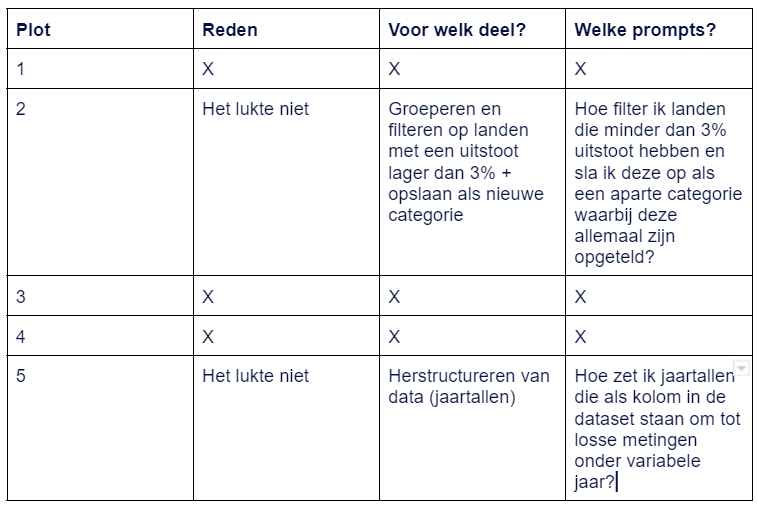